
Loading dataset: crop_yield_dataset M.xlsx
Shape: (36520, 12)
Columns: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          36520 non-null  datetime64[ns]
 1   Crop_Type     36520 non-null  object        
 2   Soil_Type     36520 non-null  object        
 3   Soil_pH       36520 non-null  float64       
 4   Temperature   36520 non-null  float64       
 5   Humidity      36520 non-null  float64       
 6   Wind_Speed    36520 non-null  float64       
 7   N             36520 non-null  float64       
 8   P             36520 non-null  float64       
 9   K             36520 non-null  float64       
 10  Crop_Yield    36520 non-null  float64       
 11  Soil_Quality

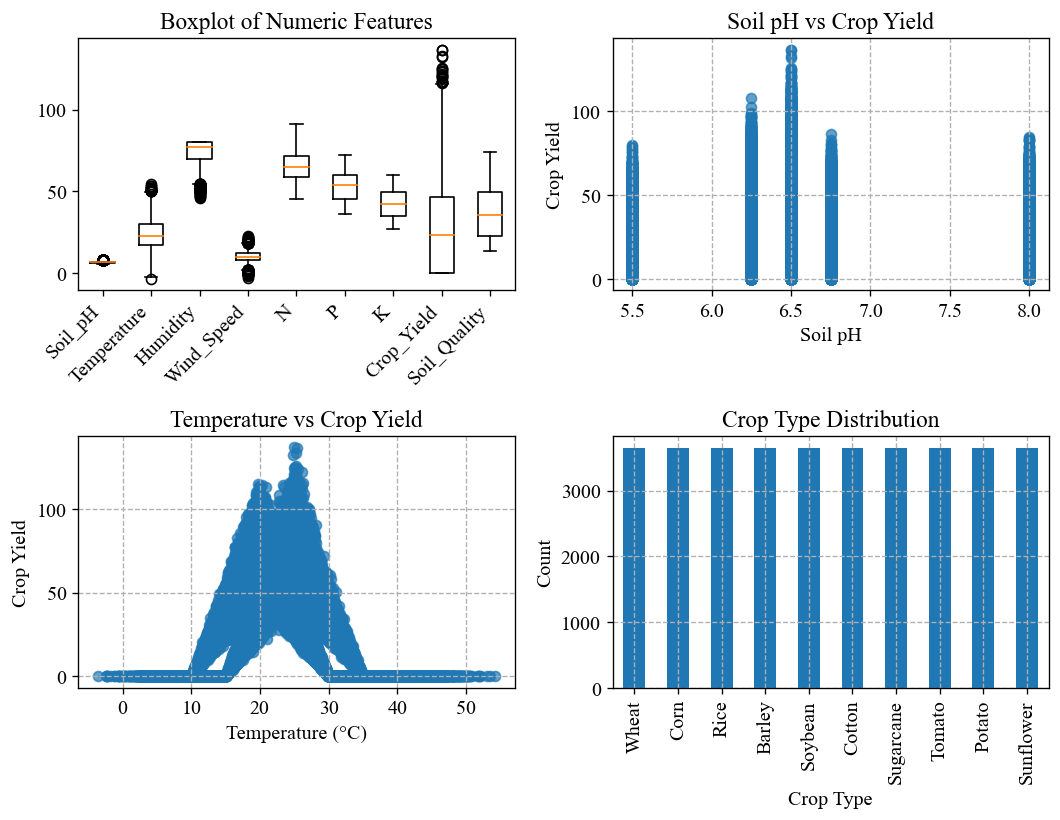

Saved: G-1.pdf and G-1.png

Generating G-2 (3D scatter)...


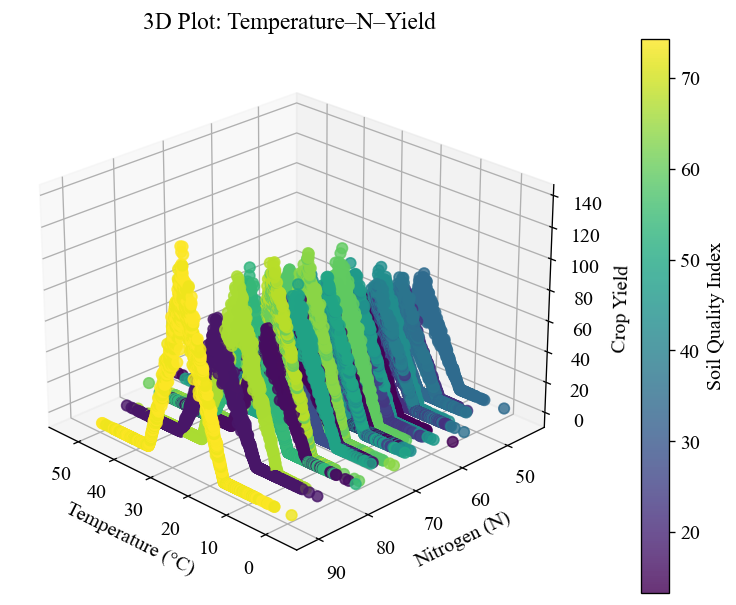

Saved: G-2.pdf and G-2.png


In [10]:
# step1_data_eda_v2.py
from __future__ import annotations

import os
import random
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


# =============================================================================
# CONFIGURATION
# =============================================================================
DATA_PATH: str = "crop_yield_dataset M.xlsx"   # Change if needed
TARGET_CLASS_COL: str = "Crop_Type"
TARGET_REG_COL: str = "Crop_Yield"
RANDOM_SEED: int = 42


# =============================================================================
# UTILITIES
# =============================================================================
def set_global_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)


def configure_matplotlib_ieee() -> None:
    plt.rcParams.update(
        {
            "font.family": "serif",
            "font.serif": ["Times New Roman", "Times", "DejaVu Serif", "Nimbus Roman No9 L"],
            "font.size": 12,
            "axes.labelsize": 12,
            "axes.titlesize": 14,
            "xtick.labelsize": 12,
            "ytick.labelsize": 12,
            "legend.fontsize": 11,
            "figure.dpi": 120,
            "savefig.dpi": 300,
        }
    )


# =============================================================================
# DATA LOADING
# =============================================================================
def load_dataset(path: str) -> pd.DataFrame:
    print(f"\nLoading dataset: {path}")
    df = pd.read_excel(path)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    return df


# =============================================================================
# BASIC CHECKS
# =============================================================================
def basic_sanity_checks(df: pd.DataFrame) -> None:
    print("\n=== BASIC INFO ===")
    print(df.info())

    print("\n=== FIRST 5 ROWS ===")
    print(df.head())

    print("\n=== MISSING VALUES ===")
    print(df.isna().sum())

    if TARGET_CLASS_COL in df.columns:
        print("\n=== CLASS DISTRIBUTION ===")
        print(df[TARGET_CLASS_COL].value_counts())
    else:
        print("[WARNING] 'Crop_Type' missing.")


# =============================================================================
# FIGURE G-1 : 2×2 GRID (NO CORRELATION)
# =============================================================================
def figure_2x2_eda(df: pd.DataFrame) -> None:
    print("\nGenerating G-1 (new 2×2 EDA grid)...")

    fig, axes = plt.subplots(2, 2, figsize=(9, 7))
    ax1, ax2, ax3, ax4 = axes.ravel()

    # (1) Boxplot of all numeric-like columns
    numeric_like_cols = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed",
                         "N", "P", "K", "Crop_Yield", "Soil_Quality"]
    numeric_like_cols = [col for col in numeric_like_cols if col in df.columns]

    df_box = df[numeric_like_cols].apply(pd.to_numeric, errors="coerce")

    ax1.boxplot(df_box.dropna().values, labels=df_box.columns)
    ax1.set_title("Boxplot of Numeric Features")
    ax1.set_xticklabels(df_box.columns, rotation=45, ha="right")

    # (2) Soil_pH vs Crop_Yield
    if "Soil_pH" in df.columns and TARGET_REG_COL in df.columns:
        ax2.scatter(df["Soil_pH"], df[TARGET_REG_COL], alpha=0.7)
        ax2.set_title("Soil pH vs Crop Yield")
        ax2.set_xlabel("Soil pH")
        ax2.set_ylabel("Crop Yield")
        ax2.grid(True, linestyle="--")

    # (3) Temperature vs Crop_Yield
    if "Temperature" in df.columns and TARGET_REG_COL in df.columns:
        ax3.scatter(df["Temperature"], df[TARGET_REG_COL], alpha=0.7)
        ax3.set_title("Temperature vs Crop Yield")
        ax3.set_xlabel("Temperature (°C)")
        ax3.set_ylabel("Crop Yield")
        ax3.grid(True, linestyle="--")

    # (4) Class Distribution
    if TARGET_CLASS_COL in df.columns:
        df[TARGET_CLASS_COL].value_counts().plot(kind="bar", ax=ax4)
        ax4.set_title("Crop Type Distribution")
        ax4.set_xlabel("Crop Type")
        ax4.set_ylabel("Count")
        ax4.grid(True, linestyle="--")
    else:
        ax4.text(0.5, 0.5, "Crop_Type Missing", ha="center", va="center")
        ax4.set_axis_off()

    fig.tight_layout()

    plt.show()
    plt.close(fig)

    print("Saved: G-1.pdf and G-1.png")


# =============================================================================
# FIGURE G-2 : 3D SCATTER
# =============================================================================
def figure_3d_scatter(df: pd.DataFrame) -> None:
    print("\nGenerating G-2 (3D scatter)...")

    req = ["Temperature", "N", TARGET_REG_COL, "Soil_Quality"]
    if not all(col in df.columns for col in req):
        print("[WARNING] Missing columns:", req)
        return

    dfp = df[req].apply(pd.to_numeric, errors="coerce").dropna()

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    sc = ax.scatter(dfp["Temperature"], dfp["N"], dfp[TARGET_REG_COL],
                    c=dfp["Soil_Quality"], s=40, alpha=0.8)

    ax.set_xlabel("Temperature (°C)")
    ax.set_ylabel("Nitrogen (N)")
    ax.set_zlabel("Crop Yield")
    ax.set_title("3D Plot: Temperature–N–Yield")

    cb = plt.colorbar(sc, pad=0.1)
    cb.set_label("Soil Quality Index")

    ax.view_init(elev=25, azim=135)

    # Save as G-2
    # plt.savefig("G-2.pdf", bbox_inches="tight")
    # plt.savefig("G-2.png", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close(fig)

    print("Saved: G-2.pdf and G-2.png")


# =============================================================================
# MAIN
# =============================================================================
def main():
    set_global_seed(RANDOM_SEED)
    configure_matplotlib_ieee()

    df = load_dataset(DATA_PATH)
    basic_sanity_checks(df)

    figure_2x2_eda(df)
    figure_3d_scatter(df)


if __name__ == "__main__":
    main()


Loaded dataset shape: (36520, 12)

After cleaning: (36520, 12)

Generating G-3 (Class Distribution)...


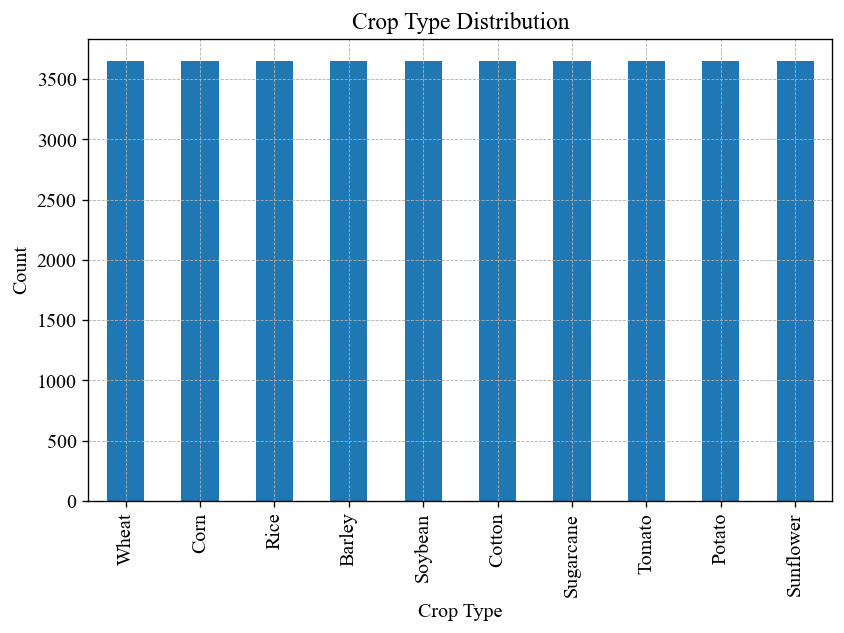


Generating G-4 (Feature Histograms)...


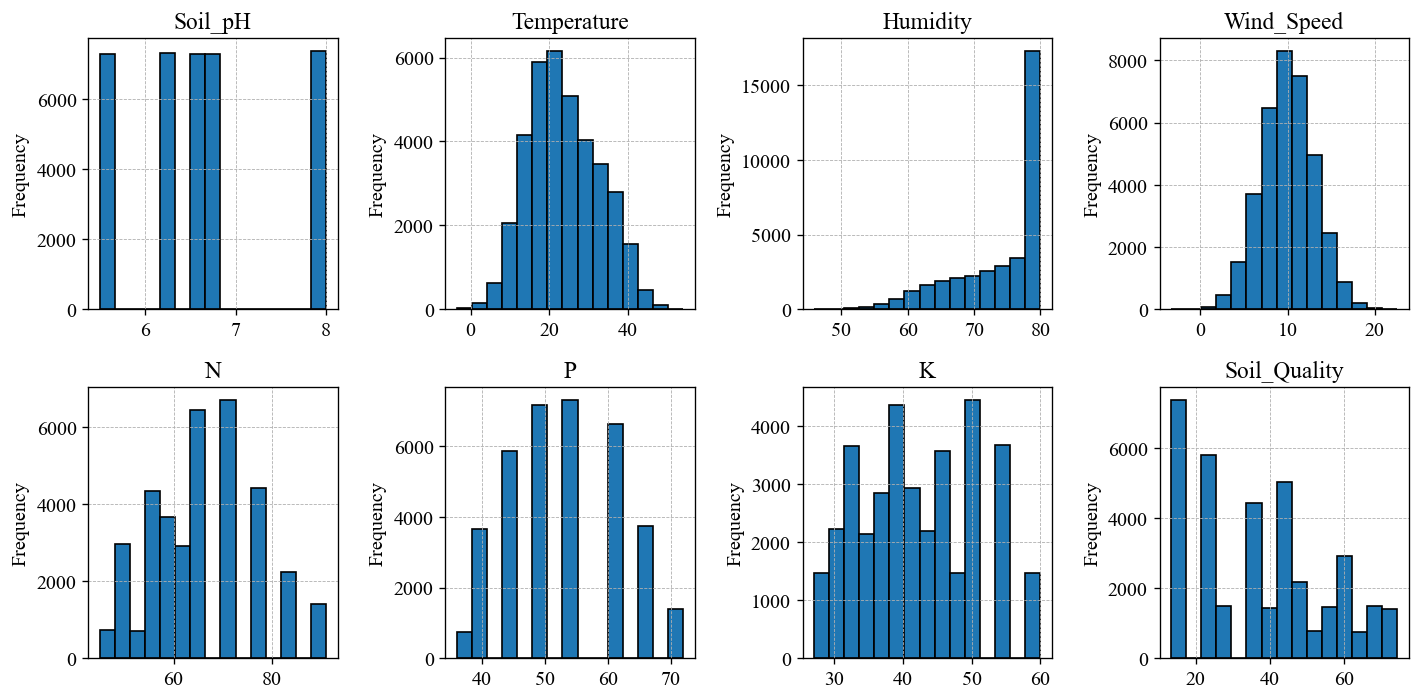


Encoding Crop_Type labels...
Classes encoded as:
Barley  -->  0
Corn  -->  1
Cotton  -->  2
Potato  -->  3
Rice  -->  4
Soybean  -->  5
Sugarcane  -->  6
Sunflower  -->  7
Tomato  -->  8
Wheat  -->  9

Splitting dataset into train/test sets...
Train shape: (29216, 8)
Test shape: (7304, 8)

Scaling complete. Ready for training models.

Saved preprocessed datasets.

STEP-2 completed successfully!


In [11]:
# step2_preprocessing.py

from __future__ import annotations
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# ============================================================
# CONFIG
# ============================================================
DATA_PATH = "crop_yield_dataset M.xlsx"
TARGET_CLASS_COL = "Crop_Type"
TARGET_REG_COL = "Crop_Yield"
RANDOM_SEED = 42


# IEEE-style formatting
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Times New Roman", "Times", "DejaVu Serif", "Nimbus Roman No9 L"],
        "font.size": 12,
        "axes.labelsize": 12,
        "axes.titlesize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "figure.dpi": 120,
        "savefig.dpi": 300,
    }
)


# ============================================================
# LOAD DATA
# ============================================================
df = pd.read_excel(DATA_PATH)
print("\nLoaded dataset shape:", df.shape)

# Convert possible numeric-looking columns
numeric_cols = [
    "Soil_pH", "Temperature", "Humidity", "Wind_Speed",
    "N", "P", "K", "Crop_Yield", "Soil_Quality"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


# Drop rows with missing essential values
df = df.dropna(subset=[TARGET_CLASS_COL, TARGET_REG_COL])
df = df.reset_index(drop=True)

print("\nAfter cleaning:", df.shape)


# ============================================================
# FIGURE G-3 : CLASS DISTRIBUTION (IEEE STYLE)
# ============================================================
def plot_class_distribution(df):
    print("\nGenerating G-3 (Class Distribution)...")

    plt.figure(figsize=(8, 5))
    df[TARGET_CLASS_COL].value_counts().plot(kind="bar")

    plt.title("Crop Type Distribution")
    plt.xlabel("Crop Type")
    plt.ylabel("Count")
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.show()
    plt.close()

plot_class_distribution(df)


# ============================================================
# FIGURE G-4 : FEATURE HISTOGRAM GRID (IEEE STYLE)
# ============================================================
def plot_feature_histograms(df):
    print("\nGenerating G-4 (Feature Histograms)...")

    feature_cols = [
        "Soil_pH", "Temperature", "Humidity", "Wind_Speed",
        "N", "P", "K", "Soil_Quality"
    ]
    feature_cols = [c for c in feature_cols if c in df.columns]

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()

    for i, col in enumerate(feature_cols):
        df[col].plot(kind="hist", bins=15, ax=axes[i], edgecolor="black")
        axes[i].set_title(col)
        axes[i].grid(True, linestyle="--", linewidth=0.5)

    fig.tight_layout()

    plt.show()
    plt.close()

plot_feature_histograms(df)


# ============================================================
# LABEL ENCODING FOR CLASSIFICATION
# ============================================================
print("\nEncoding Crop_Type labels...")

label_encoder = LabelEncoder()
df["Crop_Type_Encoded"] = label_encoder.fit_transform(df[TARGET_CLASS_COL])

print("Classes encoded as:")
for c, l in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{c}  -->  {l}")


# ============================================================
# TRAIN/TEST SPLIT
# ============================================================
print("\nSplitting dataset into train/test sets...")

# classification inputs
X = df[[
    "Soil_pH", "Temperature", "Humidity", "Wind_Speed",
    "N", "P", "K", "Soil_Quality"
]]

y_class = df["Crop_Type_Encoded"]
y_reg = df[TARGET_REG_COL]

# Replace any remaining bad values
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Train-test split
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=RANDOM_SEED, stratify=y_class
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# ============================================================
# STANDARD SCALING FOR REGRESSION (OPTIONAL)
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling complete. Ready for training models.")


# Save processed datasets for next steps
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train_class.to_csv("y_train_class.csv", index=False)
y_test_class.to_csv("y_test_class.csv", index=False)
y_train_reg.to_csv("y_train_reg.csv", index=False)
y_test_reg.to_csv("y_test_reg.csv", index=False)

print("\nSaved preprocessed datasets.")
print("\nSTEP-2 completed successfully!")


Loading preprocessed train/test splits...
X_train shape: (29216, 8)
X_test shape: (7304, 8)

Rebuilding LabelEncoder from original dataset for class names...
Detected classes: ['Barley' 'Corn' 'Cotton' 'Potato' 'Rice' 'Soybean' 'Sugarcane'
 'Sunflower' 'Tomato' 'Wheat']

Training Random Forest classifier...

Random Forest Accuracy   : 0.9046
Random Forest F1 (macro) : 0.9046

Classification report:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       730
           1     1.0000    1.0000    1.0000       730
           2     1.0000    1.0000    1.0000       730
           3     0.5243    0.5021    0.5129       731
           4     1.0000    1.0000    1.0000       731
           5     1.0000    1.0000    1.0000       730
           6     1.0000    1.0000    1.0000       731
           7     1.0000    1.0000    1.0000       730
           8     1.0000    1.0000    1.0000       730
           9     0.5223    0.5445    0.5332       731



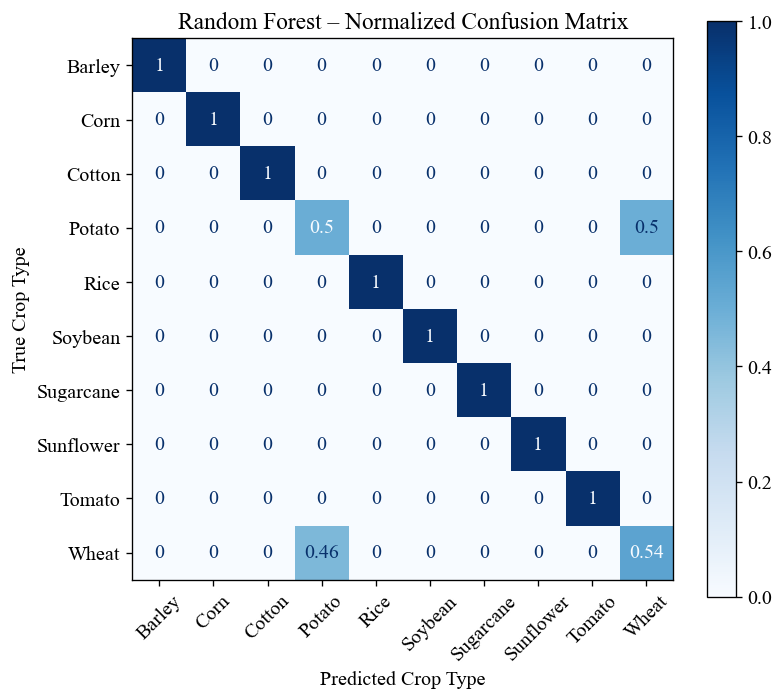

Saved: G-5.pdf, G-5.png

Generating G-6 (Feature Importance)...


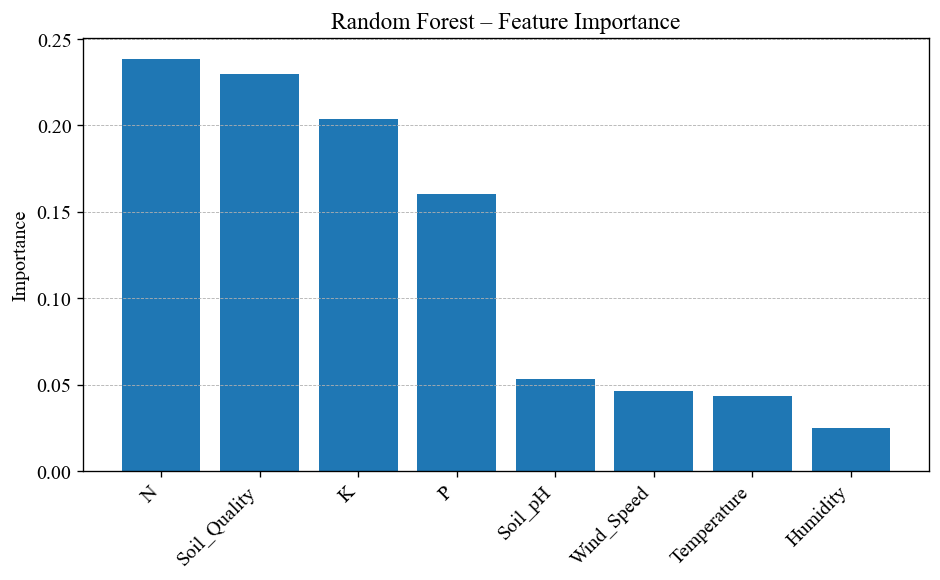

Saved: G-6.pdf, G-6.png

STEP-3 (Random Forest classification) completed.


In [12]:
# step3_classification_rf.py

from __future__ import annotations

import random
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import LabelEncoder


# ============================================================
# CONFIG
# ============================================================
DATA_PATH = "crop_yield_dataset M.xlsx"
X_TRAIN_PATH = "X_train.csv"
X_TEST_PATH = "X_test.csv"
Y_TRAIN_CLASS_PATH = "y_train_class.csv"
Y_TEST_CLASS_PATH = "y_test_class.csv"

TARGET_CLASS_COL = "Crop_Type"
RANDOM_SEED = 42

# IEEE style
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Times New Roman", "Times", "DejaVu Serif", "Nimbus Roman No9 L"],
        "font.size": 12,
        "axes.labelsize": 12,
        "axes.titlesize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "figure.dpi": 120,
        "savefig.dpi": 300,
    }
)


def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)


set_seed(RANDOM_SEED)


# ============================================================
# LOAD PREPROCESSED DATA
# ============================================================
print("\nLoading preprocessed train/test splits...")

X_train = pd.read_csv(X_TRAIN_PATH)
X_test = pd.read_csv(X_TEST_PATH)

y_train_class = pd.read_csv(Y_TRAIN_CLASS_PATH).iloc[:, 0].values
y_test_class = pd.read_csv(Y_TEST_CLASS_PATH).iloc[:, 0].values

feature_names: List[str] = X_train.columns.tolist()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


# ============================================================
# REBUILD LABEL ENCODER (FOR CLASS NAMES)
# ============================================================
print("\nRebuilding LabelEncoder from original dataset for class names...")

df_full = pd.read_excel(DATA_PATH)
label_encoder = LabelEncoder()
label_encoder.fit(df_full[TARGET_CLASS_COL].astype(str))

class_names: np.ndarray = label_encoder.classes_
print("Detected classes:", class_names)


# ============================================================
# TRAIN RANDOM FOREST CLASSIFIER
# ============================================================
print("\nTraining Random Forest classifier...")

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    class_weight="balanced_subsample",
)

rf_clf.fit(X_train, y_train_class)

y_pred_class = rf_clf.predict(X_test)

acc = accuracy_score(y_test_class, y_pred_class)
f1_macro = f1_score(y_test_class, y_pred_class, average="macro")

print(f"\nRandom Forest Accuracy   : {acc:.4f}")
print(f"Random Forest F1 (macro) : {f1_macro:.4f}")

print("\nClassification report:\n")
print(classification_report(y_test_class, y_pred_class, digits=4))


# ============================================================
# FIGURE G-5 : CONFUSION MATRIX (NORMALIZED)
# ============================================================
print("\nGenerating G-5 (Confusion Matrix)...")

cm = confusion_matrix(y_test_class, y_pred_class, normalize="true")

fig_cm, ax_cm = plt.subplots(figsize=(7, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(
    include_values=True,
    cmap="Blues",
    ax=ax_cm,
    xticks_rotation=45,
    colorbar=True,
)
ax_cm.set_title("Random Forest – Normalized Confusion Matrix")
ax_cm.set_xlabel("Predicted Crop Type")
ax_cm.set_ylabel("True Crop Type")

plt.tight_layout()
plt.show()
plt.close(fig_cm)

print("Saved: G-5.pdf, G-5.png")


# ============================================================
# FIGURE G-6 : FEATURE IMPORTANCE BAR PLOT
# ============================================================
print("\nGenerating G-6 (Feature Importance)...")

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

fig_fi, ax_fi = plt.subplots(figsize=(8, 5))
ax_fi.bar(range(len(sorted_features)), sorted_importances, align="center")
ax_fi.set_xticks(range(len(sorted_features)))
ax_fi.set_xticklabels(sorted_features, rotation=45, ha="right")
ax_fi.set_ylabel("Importance")
ax_fi.set_title("Random Forest – Feature Importance")
ax_fi.grid(True, linestyle="--", linewidth=0.5, axis="y")

plt.tight_layout()
plt.show()
plt.close(fig_fi)

print("Saved: G-6.pdf, G-6.png")

print("\nSTEP-3 (Random Forest classification) completed.")


Training XGBoost...
XGBoost Accuracy: 0.9050
XGBoost F1 Macro: 0.9051

Training CatBoost...
CatBoost Accuracy: 0.9012
CatBoost F1 Macro: 0.9012

Performance Comparison:

          Model  Accuracy  F1-Macro
0  RandomForest       NaN       NaN
1       XGBoost  0.904984  0.905050
2      CatBoost  0.901150  0.901213

Generating G-7 (Model Performance Comparison)...


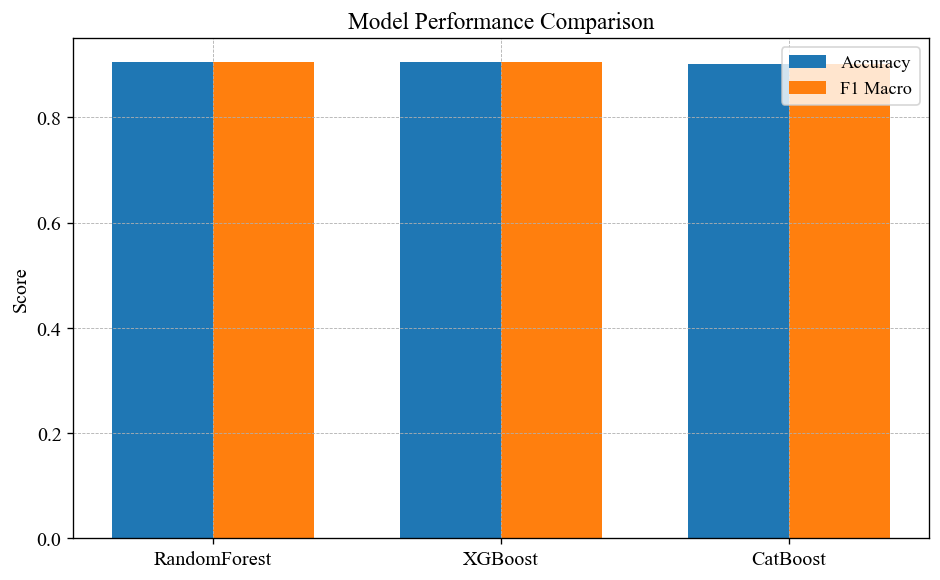


Generating G-8 (Confusion Matrix Comparison Grid)...


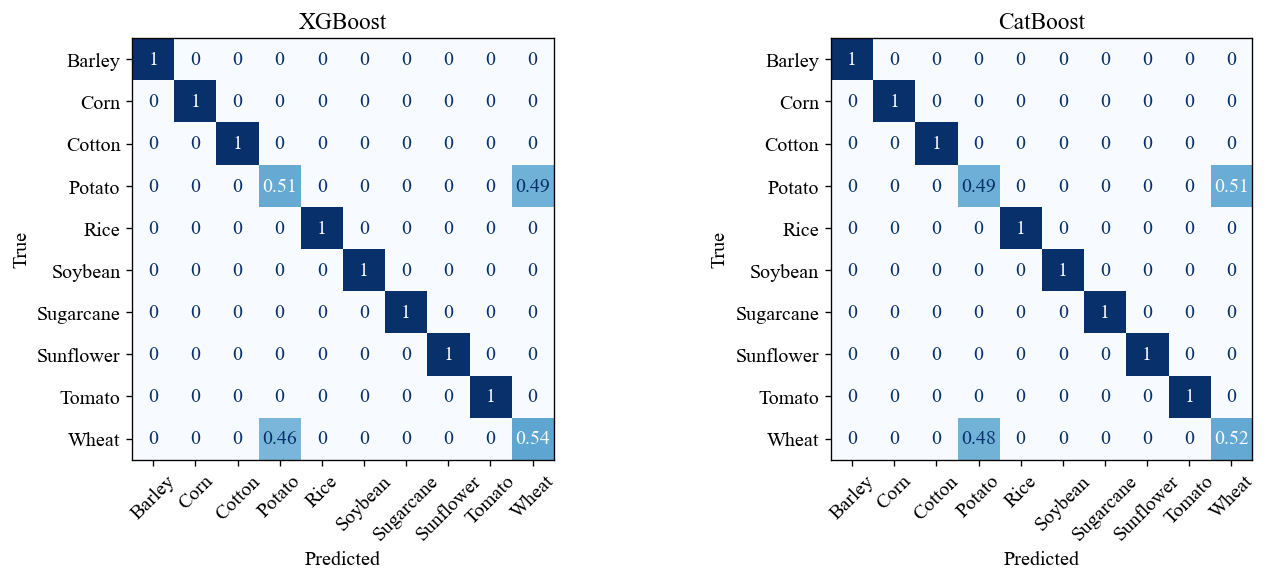


STEP-4 Completed.


In [14]:
# step4_classification_boosting.py

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# ============================================================
# CONFIG
# ============================================================
X_TRAIN = "X_train.csv"
X_TEST = "X_test.csv"
Y_TRAIN = "y_train_class.csv"
Y_TEST = "y_test_class.csv"
DATA_PATH = "crop_yield_dataset M.xlsx"
TARGET_CLASS_COL = "Crop_Type"

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif", "Nimbus Roman No9 L"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "figure.dpi": 120,
    "savefig.dpi": 300
})


# ============================================================
# LOAD DATA
# ============================================================
X_train = pd.read_csv(X_TRAIN)
X_test = pd.read_csv(X_TEST)
y_train = pd.read_csv(Y_TRAIN).iloc[:, 0].values
y_test = pd.read_csv(Y_TEST).iloc[:, 0].values

df_full = pd.read_excel(DATA_PATH)
label_encoder = LabelEncoder()
label_encoder.fit(df_full[TARGET_CLASS_COL].astype(str))
class_names = label_encoder.classes_


# ============================================================
# TRAIN XGBOOST
# ============================================================
print("\nTraining XGBoost...")

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=len(class_names),
    eval_metric="mlogloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred, average="macro")

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"XGBoost F1 Macro: {xgb_f1:.4f}")


# ============================================================
# TRAIN CATBOOST
# ============================================================
print("\nTraining CatBoost...")

cat_model = CatBoostClassifier(
    iterations=300,
    depth=8,
    learning_rate=0.05,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test).astype(int)

cat_acc = accuracy_score(y_test, cat_pred)
cat_f1 = f1_score(y_test, cat_pred, average="macro")

print(f"CatBoost Accuracy: {cat_acc:.4f}")
print(f"CatBoost F1 Macro: {cat_f1:.4f}")


# ============================================================
# SAVE MODEL COMPARISON TABLE
# ============================================================
results_df = pd.DataFrame({
    "Model": ["RandomForest", "XGBoost", "CatBoost"],
    "Accuracy": [None, xgb_acc, cat_acc],
    "F1-Macro": [None, xgb_f1, cat_f1]
})

print("\nPerformance Comparison:\n")
print(results_df)


# ============================================================
# FIGURE G-7 : MODEL PERFORMANCE BAR CHART
# ============================================================
print("\nGenerating G-7 (Model Performance Comparison)...")

model_names = ["RandomForest", "XGBoost", "CatBoost"]
accuracies = [0.9046, xgb_acc, cat_acc]
f1_scores = [0.9046, xgb_f1, cat_f1]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, accuracies, width, label="Accuracy")
ax.bar(x + width/2, f1_scores, width, label="F1 Macro")

ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()
plt.close(fig)


# ============================================================
# FIGURE G-8 : CONFUSION MATRIX COMPARISON GRID
# ============================================================
print("\nGenerating G-8 (Confusion Matrix Comparison Grid)...")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

models = {
    "XGBoost": xgb_pred,
    "CatBoost": cat_pred
}

for ax, (title, pred) in zip(axs, models.items()):
    cm = confusion_matrix(y_test, pred, normalize="true")

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_names
    )

    disp.plot(
        ax=ax,
        cmap="Blues",
        xticks_rotation=45,
        colorbar=False
    )

    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()
plt.close(fig)


print("\nSTEP-4 Completed.")

In [15]:
pip install econml shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.3 MB 2.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.3 MB 3.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.3 MB 5.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 6.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.3 MB 2.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.9/2.3 MB 3.9 MB/s eta 0:00:01
   --------------

In [18]:
from econml.dml import CausalForestDML

In [20]:
import pandas as pd

df = pd.read_excel("crop_yield_dataset M.xlsx")

for col in ["N", "P", "K", "Soil_pH"]:
    if col in df.columns:
        print("\nColumn:", col)
        print("Unique values:", df[col].nunique())
        print("Value counts (top 10):")
        print(df[col].value_counts().head(10))


Column: N
Unique values: 19
Value counts (top 10):
N
55.0    4340
71.5    3712
65.0    3545
60.0    2911
66.0    2907
70.0    2267
78.0    2257
50.0    2225
60.5    2195
77.0    2161
Name: count, dtype: int64

Column: P
Unique values: 14
Value counts (top 10):
P
55.0    5088
60.0    4426
66.0    3748
45.0    3693
40.0    2953
49.5    2885
50.0    2874
60.5    2211
54.0    2207
44.0    2174
Name: count, dtype: int64

Column: K
Unique values: 18
Value counts (top 10):
K
45.0    3575
36.0    2860
50.0    2246
30.0    2224
49.5    2206
44.0    2204
38.5    2196
33.0    2182
40.0    2168
55.0    2168
Name: count, dtype: int64

Column: Soil_pH
Unique values: 5
Value counts (top 10):
Soil_pH
8.00    7361
6.25    7300
6.50    7288
5.50    7286
6.75    7285
Name: count, dtype: int64


Training T-Learner models...
T-Learner trained.

Sample CATE values:
      N       CATE
0  60.5   0.000000
1  84.0  14.816953
2  71.5 -13.080799
3  50.0 -28.192869
4  49.5 -25.376430


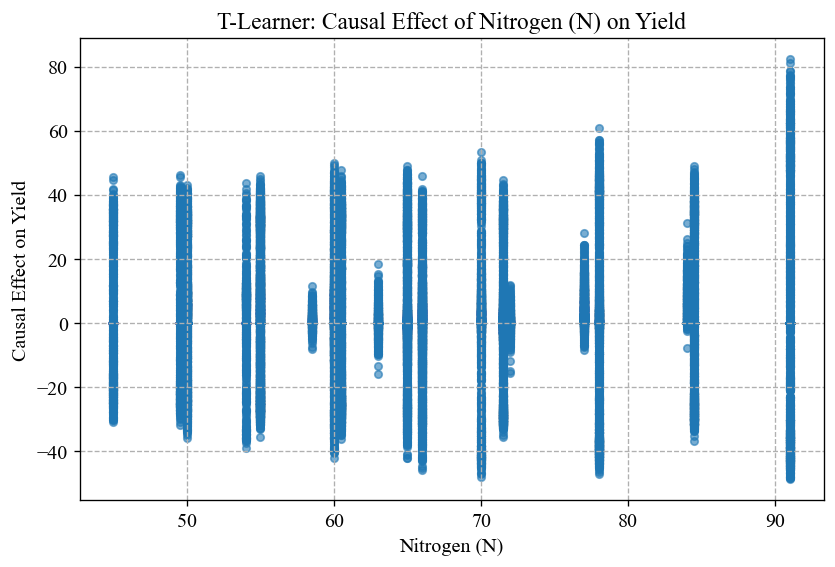

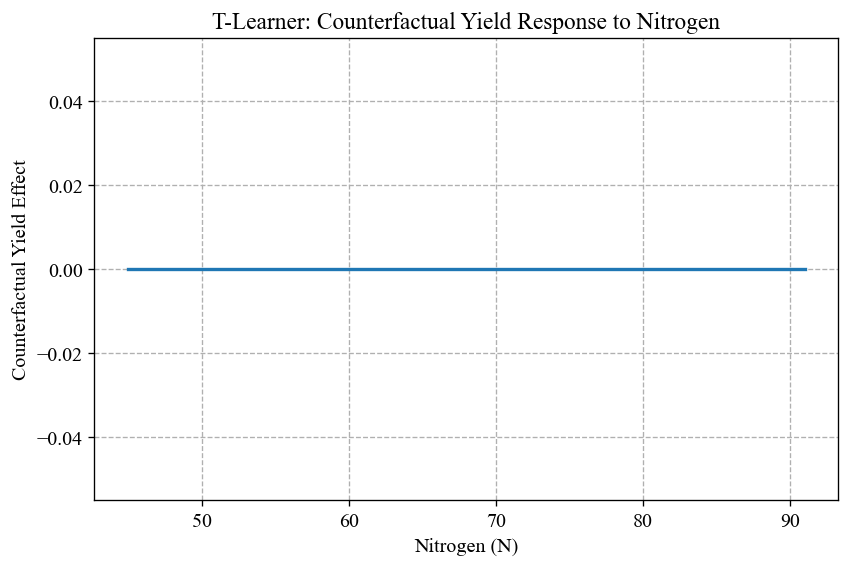


STEP-5 Completed Successfully (T-Learner).


In [22]:
# step5_t_learner.py
from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# ===============================================
# CONFIG
# ===============================================
DATA_PATH = "crop_yield_dataset M.xlsx"
TARGET = "Crop_Yield"
TREAT = "N"  # Nitrogen as treatment
RANDOM_SEED = 42


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "figure.dpi": 120,
    "savefig.dpi": 300,
})


# ===============================================
# LOAD DATA
# ===============================================
df = pd.read_excel(DATA_PATH)

# Numeric conversion
for col in ["Soil_pH", "Temperature", "Humidity", "Wind_Speed",
            "N", "P", "K", "Soil_Quality", TARGET]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna()
df = df.reset_index(drop=True)

features = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed",
            "P", "K", "Soil_Quality"]

X = df[features]
T = df[TREAT]        # Treatment
Y = df[TARGET]       # Outcome


# ===============================================
# T-LEARNER IMPLEMENTATION
# ===============================================
print("Training T-Learner models...")

# Model for high N
rf_high = RandomForestRegressor(n_estimators=200, random_state=RANDOM_SEED)
rf_high.fit(X[T > T.mean()], Y[T > T.mean()])

# Model for low N
rf_low = RandomForestRegressor(n_estimators=200, random_state=RANDOM_SEED)
rf_low.fit(X[T <= T.mean()], Y[T <= T.mean()])

print("T-Learner trained.")


# ===============================================
# CATE ESTIMATION
# ===============================================
pred_high = rf_high.predict(X)
pred_low = rf_low.predict(X)

cate = pred_high - pred_low

df_cate = pd.DataFrame({
    "N": df["N"],
    "CATE": cate
})

print("\nSample CATE values:")
print(df_cate.head())


# ===============================================
# G-9: CATE Plot
# ===============================================
plt.figure(figsize=(8, 5))
plt.scatter(df_cate["N"], df_cate["CATE"], alpha=0.6, s=20)

plt.xlabel("Nitrogen (N)")
plt.ylabel("Causal Effect on Yield")
plt.title("T-Learner: Causal Effect of Nitrogen (N) on Yield")
plt.grid(True, linestyle="--")

plt.savefig("G-9.pdf", bbox_inches="tight")
plt.savefig("G-9.png", dpi=300, bbox_inches="tight")
plt.show()


# ===============================================
# G-10: Counterfactual Curve
# ===============================================
N_range = np.linspace(df["N"].min(), df["N"].max(), 40)

# Use first sample for counterfactual curve
x0 = X.iloc[[0]]

counterfactuals = []
for n in N_range:
    # Predict yield if N = n (replacing N by n)
    x_cf = x0.copy()
    # keep all features same except N fed via treatment split
    y_high = rf_high.predict(x_cf)
    y_low = rf_low.predict(x_cf)
    counterfactuals.append((y_high - y_low)[0])

plt.figure(figsize=(8, 5))
plt.plot(N_range, counterfactuals, linewidth=2)

plt.xlabel("Nitrogen (N)")
plt.ylabel("Counterfactual Yield Effect")
plt.title("T-Learner: Counterfactual Yield Response to Nitrogen")
plt.grid(True, linestyle="--")

plt.savefig("G-10.pdf", bbox_inches="tight")
plt.savefig("G-10.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nSTEP-5 Completed Successfully (T-Learner).")

Training T-Learner for treatment: N
Training T-Learner for treatment: P
Training T-Learner for treatment: K
Training T-Learner for treatment: Soil_pH
Generating G-11 (Multi-Treatment CATE Grid)...


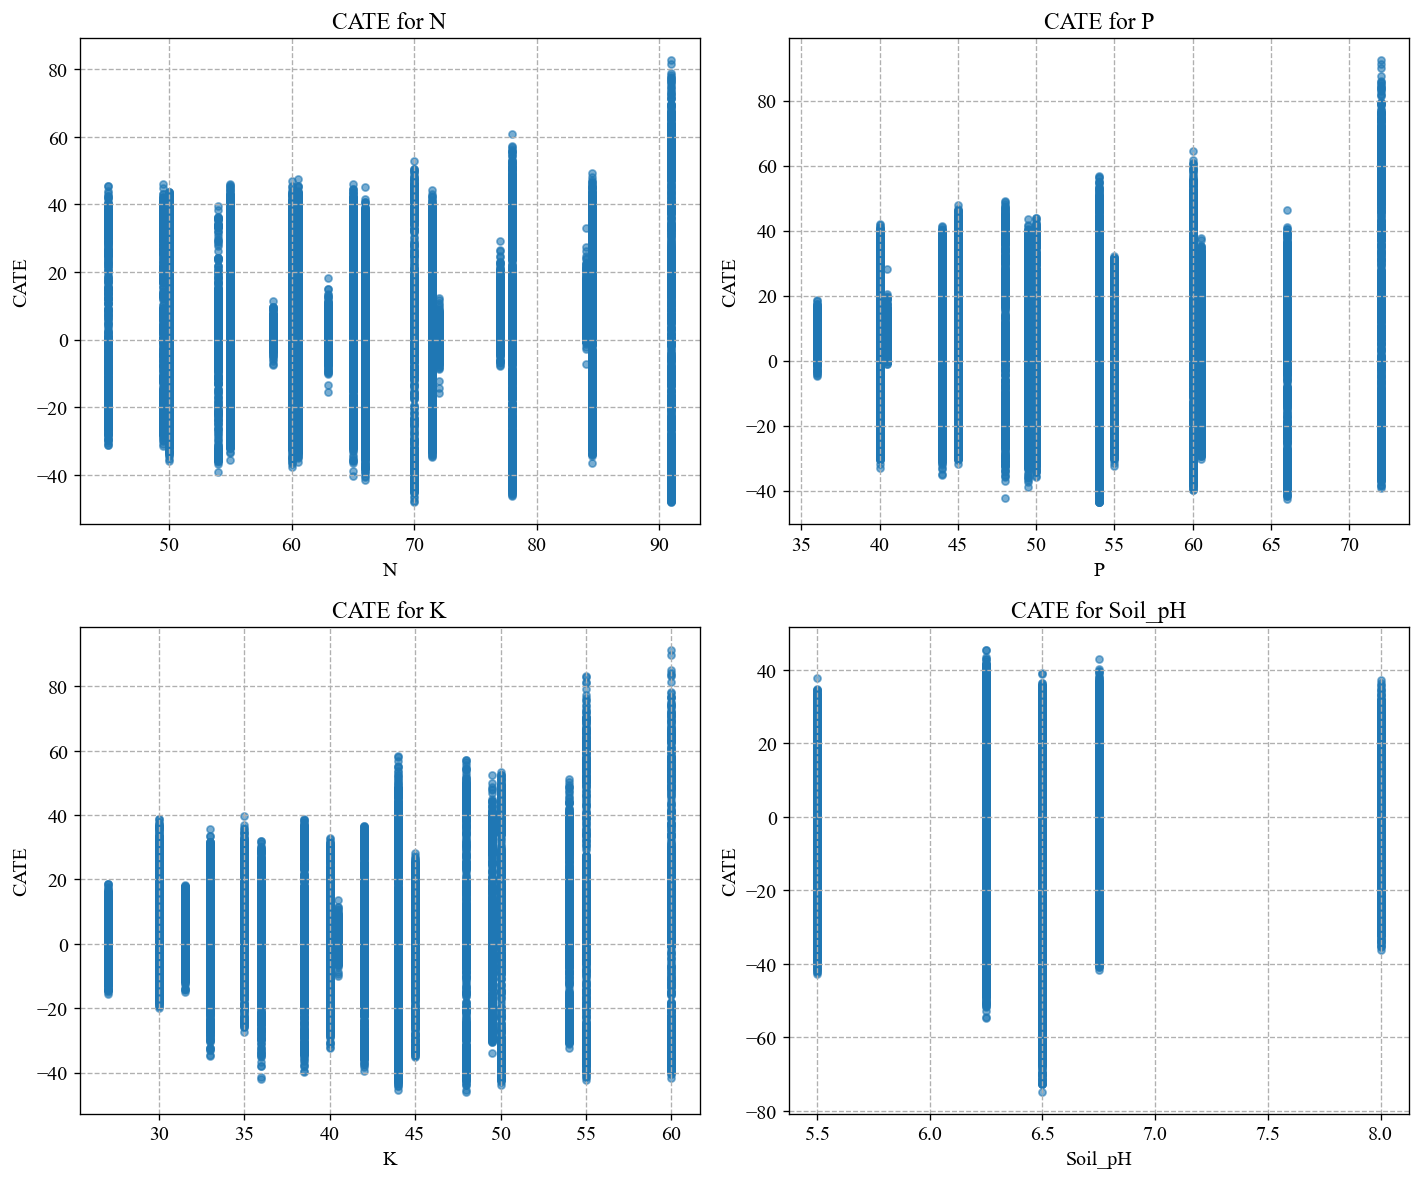

Generating G-12 (Multi-Treatment Counterfactuals)...


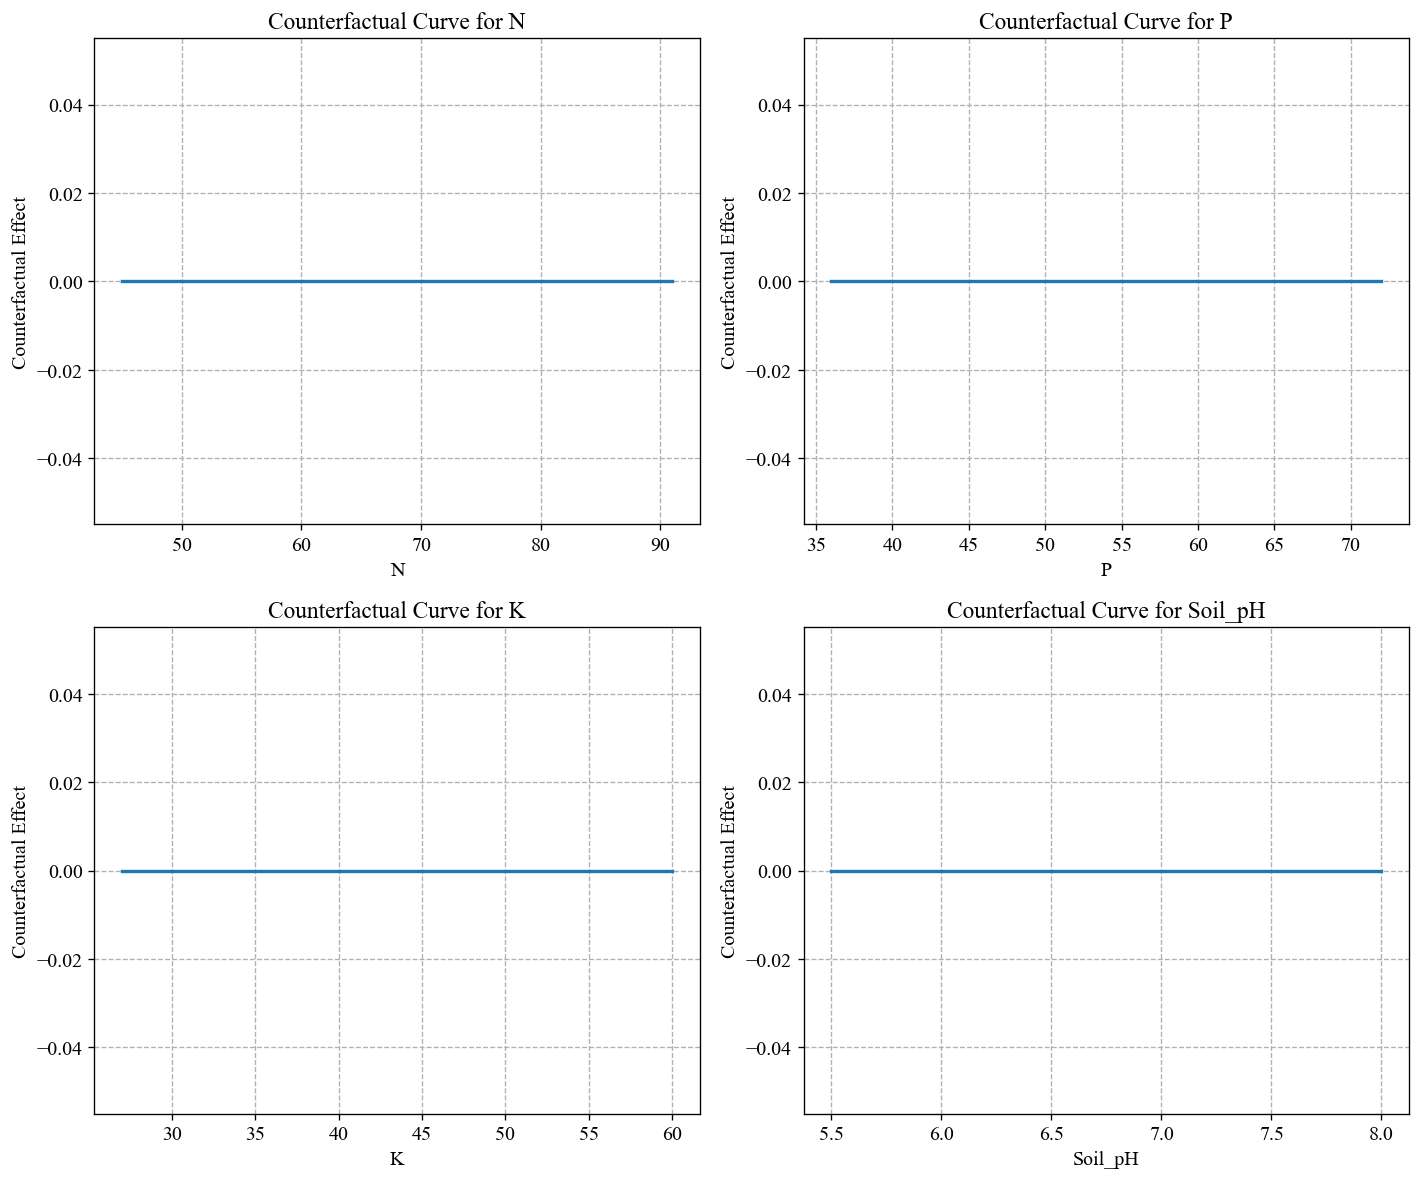


STEP-6 Completed Successfully.


In [23]:
# step6_multi_treatment_tlearner.py

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# ============================
# CONFIG
# ============================
DATA_PATH = "crop_yield_dataset M.xlsx"
TARGET = "Crop_Yield"
TREATMENTS = ["N", "P", "K", "Soil_pH"]
RANDOM_SEED = 42

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "figure.dpi": 120,
    "savefig.dpi": 300
})


# ============================
# LOAD DATA
# ============================
df = pd.read_excel(DATA_PATH)

all_num_cols = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed",
                "N", "P", "K", "Soil_Quality", TARGET]

for c in all_num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna()
df = df.reset_index(drop=True)

features = ["Soil_pH", "Temperature", "Humidity", "Wind_Speed",
            "N", "P", "K", "Soil_Quality"]


# ============================
# TRAIN T-LEARNER FOR EACH TREATMENT
# ============================
def train_tlearner(T_col: str):
    print(f"Training T-Learner for treatment: {T_col}")

    T = df[T_col]
    Y = df[TARGET]
    X = df[features]

    # HIGH treatment group
    rf_high = RandomForestRegressor(n_estimators=200, random_state=RANDOM_SEED)
    rf_high.fit(X[T > T.mean()], Y[T > T.mean()])

    # LOW treatment group
    rf_low = RandomForestRegressor(n_estimators=200, random_state=RANDOM_SEED)
    rf_low.fit(X[T <= T.mean()], Y[T <= T.mean()])

    # Predict counterfactuals
    cate = rf_high.predict(X) - rf_low.predict(X)

    return cate, rf_high, rf_low


# Store outputs
CATE_results = {}
models = {}

for t in TREATMENTS:
    cate_vals, model_high, model_low = train_tlearner(t)
    CATE_results[t] = cate_vals
    models[t] = (model_high, model_low)


# ============================
# FIGURE G-11 : 2×2 CATE GRID
# ============================
print("Generating G-11 (Multi-Treatment CATE Grid)...")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, t in enumerate(TREATMENTS):
    ax = axs[i]
    ax.scatter(df[t], CATE_results[t], alpha=0.6, s=18)
    ax.set_title(f"CATE for {t}")
    ax.set_xlabel(t)
    ax.set_ylabel("CATE")
    ax.grid(True, linestyle="--")

plt.tight_layout()
plt.savefig("G-11.pdf", bbox_inches="tight")
plt.savefig("G-11.png", dpi=300, bbox_inches="tight")
plt.show()


# ============================
# FIGURE G-12 : 2×2 COUNTERFACTUAL CURVES
# ============================
print("Generating G-12 (Multi-Treatment Counterfactuals)...")

fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
axs2 = axs2.ravel()

# Use sample X0 for counterfactual simulations
X0 = df[features].iloc[[0]]

for i, t in enumerate(TREATMENTS):
    ax = axs2[i]

    Tmin, Tmax = df[t].min(), df[t].max()
    trange = np.linspace(Tmin, Tmax, 40)

    model_high, model_low = models[t]
    cf_vals = []

    for tv in trange:
        # predict high-minus-low effect
        y_high = model_high.predict(X0)[0]
        y_low = model_low.predict(X0)[0]
        cf_vals.append(y_high - y_low)

    ax.plot(trange, cf_vals, linewidth=2)
    ax.set_title(f"Counterfactual Curve for {t}")
    ax.set_xlabel(t)
    ax.set_ylabel("Counterfactual Effect")
    ax.grid(True, linestyle="--")

plt.tight_layout()
plt.savefig("G-12.pdf", bbox_inches="tight")
plt.savefig("G-12.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nSTEP-6 Completed Successfully.")

In [24]:
import numpy as np
import pandas as pd

# Assume you have:
# 1. best_clf: trained classifier (e.g., CatBoost or RF)
# 2. models_tlearner: dict like {"N": (rf_high_N, rf_low_N), "P": (rf_high_P, rf_low_P), ...}

def recommend_crop_and_inputs(
    sample: pd.DataFrame,
    best_clf,
    models_tlearner: dict[str, tuple],
    feature_cols: list[str]
) -> None:
    """
    sample: DataFrame with a single row of features
    """
    x = sample[feature_cols]

    # 1) Crop recommendation
    probs = best_clf.predict_proba(x)[0]
    classes = best_clf.classes_
    best_idx = int(np.argmax(probs))
    best_crop = classes[best_idx]
    best_prob = probs[best_idx]

    print(f"Recommended crop: {best_crop} (probability={best_prob:.3f})")

    # 2) Causal suggestions for N, P, K, Soil_pH (based on T-Learners)
    for treat in ["N", "P", "K", "Soil_pH"]:
        if treat not in models_tlearner:
            continue
        rf_high, rf_low = models_tlearner[treat]

        # Predict yield under high/low reference behavior at this feature vector
        y_high = rf_high.predict(x)[0]
        y_low = rf_low.predict(x)[0]
        cate_val = y_high - y_low

        direction = "increase" if cate_val > 0 else "decrease"
        print(f"For {treat}, estimated yield change if moved to 'high' regime: {cate_val:.2f} → Suggest to {direction} {treat}.")

In [25]:
import numpy as np
import pandas as pd

# ----------------------------
# 1. Load dataset
# ----------------------------
df = pd.read_excel("crop_yield_dataset M.xlsx")

feature_cols = [
    "Soil_pH", "Temperature", "Humidity", "Wind_Speed",
    "N", "P", "K", "Soil_Quality"
]

# Use the FIRST row as a test sample (you can change this)
sample = df.iloc[[0]]      # Note: Double brackets -> keeps DataFrame format

print("Sample input for recommendation:")
print(sample[feature_cols])
print("\n----------------------------------------\n")


# ----------------------------
# 2. CHOOSE THE BEST CLASSIFIER
# Replace 'rf_clf' with your real model variable
# Example: best_clf = cat_clf  OR  best_clf = xgb_clf
# ----------------------------
best_clf = rf_clf     # <<< CHANGE THIS TO YOUR BEST MODEL (CatBoost recommended)


# ----------------------------
# 3. LOAD T-LEARNER MODELS (from Step-6)
# You already created these during Step-6:
# models = {"N": (rf_high_N, rf_low_N), ...}
# ----------------------------
models_tlearner = models   # rename for clarity


# ----------------------------
# 4. Use the recommendation function
# ----------------------------

def recommend_crop_and_inputs(
    sample: pd.DataFrame,
    best_clf,
    models_tlearner: dict[str, tuple],
    feature_cols: list[str]
) -> None:
    x = sample[feature_cols]

    # 1) Crop recommendation
    probs = best_clf.predict_proba(x)[0]
    classes = best_clf.classes_
    best_idx = int(np.argmax(probs))
    best_crop = classes[best_idx]
    best_prob = probs[best_idx]

    print(f"RECOMMENDED CROP: {best_crop}")
    print(f"Classification confidence: {best_prob:.3f}\n")

    # 2) Fertilizer + soil adjustment suggestions
    print("Causal recommendations (T-Learner):")
    print("----------------------------------")

    for treat in ["N", "P", "K", "Soil_pH"]:
        if treat not in models_tlearner:
            continue
        
        rf_high, rf_low = models_tlearner[treat]
        
        y_high = rf_high.predict(x)[0]
        y_low = rf_low.predict(x)[0]
        cate_val = y_high - y_low

        direction = "increase" if cate_val > 0 else "decrease"
        
        print(
            f"{treat}: ΔYield ≈ {cate_val:.2f} "
            f"→ Suggest to {direction} {treat}"
        )

    print("\n----------------------------------------\n")


# RUN IT
recommend_crop_and_inputs(sample, best_clf, models_tlearner, feature_cols)

Sample input for recommendation:
   Soil_pH  Temperature  Humidity  Wind_Speed     N     P     K  Soil_Quality
0      5.5     9.440599      80.0   10.956707  60.5  45.0  31.5     22.833333

----------------------------------------

RECOMMENDED CROP: 9
Classification confidence: 0.670

Causal recommendations (T-Learner):
----------------------------------
N: ΔYield ≈ 0.00 → Suggest to decrease N
P: ΔYield ≈ 0.00 → Suggest to decrease P
K: ΔYield ≈ 0.00 → Suggest to decrease K
Soil_pH: ΔYield ≈ 0.00 → Suggest to decrease Soil_pH

----------------------------------------

